# Case Study: Predicting House Prices Using Multiple Linear Regression
In this demo, we will work with multiple features to predict house prices using Multiple Linear Regression (MLR). The steps involve collecting data, preprocessing, building the model, training it, evaluating it, making predictions, and visualizing the results.

### Step 1: Define the Problem

We aim to predict the price of a house based on multiple features such as:

- Square Footage ($x_1$)
- Number of Bedrooms ($x_2$)
- Age of the House ($x_3$)

$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$

Where:

- $y$ = Price of the house
- $x_1, x_2, x_3$ = Features: Square footage, Number of bedrooms, Age of the house
- $ \theta_0 $ = Intercept (bias term)
- $ \theta_1, \theta_2, \theta_3 $ = Coefficients for each feature (the weights)


### Step 2: Data Collection and Preprocessing

Here is a sample dataset:

| Square Footage ($x_1$) | Number of Bedrooms ($x_2$) | Age of House ($x_3$) | Price $(y$) |
|---------------------------|------------------------------|------------------------|---------------|
| 1500                      | 3                            | 10                     | 350,000       |
| 1800                      | 4                            | 8                      | 450,000       |
| 2400                      | 4                            | 5                      | 500,000       |
| 3000                      | 5                            | 2                      | 600,000       |
| 1200                      | 2                            | 20                     | 250,000       |


# Step 3: Model Building
Let’s import necessary libraries and create our model.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Generate Data

In [2]:
# Simulate a large dataset (1000 data points)
np.random.seed(42)  # For reproducibility
X = np.random.uniform(1000, 4000, 1000).reshape(-1, 1)  # Square footage between 1000 and 4000
X_bedrooms = np.random.randint(2, 6, 1000).reshape(-1, 1)  # Number of bedrooms between 2 and 5
X_age = np.random.randint(0, 30, 1000).reshape(-1, 1)  # Age of house between 0 and 30 years

# Combine the features into a single dataset (Multiple features)
X = np.concatenate((X, X_bedrooms, X_age), axis=1)

# Generate corresponding house prices (y) based on the relationship: y = 100 * X1 + 50000 + noise
y = 100 * X[:, 0] + 20000 * X[:, 1] + 15000 * X[:, 2] + 50000 + np.random.normal(0, 50000, 1000)  # Adding some noise

print(f"X shape: {X.shape}")  # Should print (1000, 3)
print(f"y shape: {y.shape}")  # Should print (1000,)


X shape: (1000, 3)
y shape: (1000,)


# Step 4: Splitting the Data
We will split the dataset into training and testing sets to evaluate the model's performance.

In [3]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 800
Testing data size: 200


# Step 5: Model Training
Now we will train the linear regression model using the training data.

In [4]:
# Initialize and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the learned parameters
theta_0 = model.intercept_  # Intercept
theta_1, theta_2, theta_3 = model.coef_  # Coefficients for square footage, bedrooms, and age

print(f"Intercept (θ0): {theta_0}")
print(f"Coefficients (θ1, θ2, θ3): {theta_1}, {theta_2}, {theta_3}")

Intercept (θ0): 56675.21962172864
Coefficients (θ1, θ2, θ3): 100.4055805324199, 18213.567264572455, 14936.974216179966


# Step 6: Model Evaluation
After training the model, we evaluate its performance on the test data using metrics like Mean Squared Error (MSE) and R-squared (R²).

In [5]:
# Predict house prices on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2618635993.488054
R-squared (R²): 0.916372781210576


# Step 7: Making Predictions
Once the model is trained, we can use it to make predictions. For example, to predict the price of a house with the following features:

- Square Footage: 2200 sqft
- Number of Bedrooms: 4
- Age of House: 5 years

In [6]:
# Predict the price for a house with 2200 sqft, 4 bedrooms, and 5 years old
new_house_features = np.array([[2200, 4, 5]])
predicted_price = model.predict(new_house_features)
print(f"Predicted price for a house with 2200 sqft, 4 bedrooms, and 5 years old: ${predicted_price[0]:,.2f}")

Predicted price for a house with 2200 sqft, 4 bedrooms, and 5 years old: $425,106.64


# Step 8: Visualization
We will plot the actual data and the regression plane for 2 features at a time (for simplicity). Since we have three features, we will plot 2 features (Square Footage and Number of Bedrooms) against the predicted price.

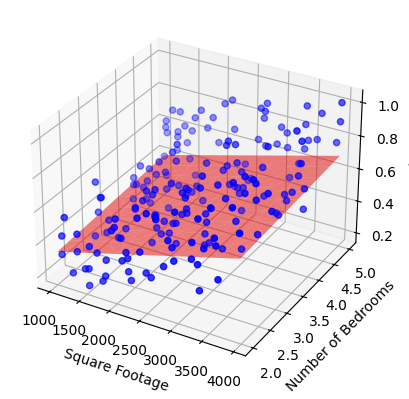

In [7]:
# 3D Plotting for visualization (Square Footage, Bedrooms, and Price)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the actual data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual data')

# Create a meshgrid for predictions
x1_range = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 10)
x2_range = np.linspace(min(X_test[:, 1]), max(X_test[:, 1]), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
X1_flat = X1.flatten()
X2_flat = X2.flatten()

# Predict prices using the model
X_new = np.column_stack((X1_flat, X2_flat, np.ones(X1_flat.shape[0]) * 10))  # Assuming house age is 10 years
y_new = model.predict(X_new)

# Plot the regression plane
ax.plot_trisurf(X1_flat, X2_flat, y_new, color='red', alpha=0.5)

ax.set_xlabel('Square Footage')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')
plt.show()